<a href="https://colab.research.google.com/github/KalyaniTBhandwalkar/Assignment/blob/main/LS_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
# import necessary librabries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [148]:
import warnings
warnings. filterwarnings('ignore')

In [149]:
df=pd.read_csv("/content/LS_2.0.csv" )

In [150]:
df.head(2)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790


In [151]:
df.describe()

,WINNER,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
count,2263.000000,2018.000000,2.263000e+03,2263.000000,2.263000e+03,2263.000000,2263.000000,2.263000e+03
mean,0.238179,52.273538,2.615991e+05,990.710561,2.625898e+05,15.811412,23.190525,1.658016e+06
std,0.426064,11.869373,2.549906e+05,1602.839174,2.559822e+05,14.962861,21.564758,3.145187e+05
min,0.000000,25.000000,1.339000e+03,0.000000,1.342000e+03,0.097941,1.000039,5.518900e+04
25%,0.000000,43.250000,2.103450e+04,57.000000,2.116250e+04,1.296518,1.899502,1.530014e+06
50%,0.000000,52.000000,1.539340e+05,316.000000,1.544890e+05,10.510553,16.221721,1.679030e+06
75%,0.000000,61.000000,4.858040e+05,1385.000000,4.872315e+05,29.468185,42.590233,1.816857e+06
max,1.000000,86.000000,1.066824e+06,19367.000000,1.068569e+06,51.951012,74.411856,3.150313e+06


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   CRIMINAL
CASES                            2018 non-null   object 
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

In [153]:
df. rename(columns = {'CRIMINAL\nCASES':'CRIMINAL_CASES'}, inplace = True)
df.head(2)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL_CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790


In [154]:
df.shape

(2263, 19)

# Total number of States

In [155]:
df['STATE'].unique().shape

(36,)

# Total number of Contestants

In [156]:
df['NAME'].unique().shape

(2014,)

# Total number of Parties 

In [157]:
df['PARTY'].unique().shape

(133,)

In [158]:
# df1 is separate dataset of winner candidates
df1=df.loc[df['WINNER'] == 1]
def target_col(PARTY):
    if df1.PARTY.value_counts()<=9:
      df1.PARTY="OTHER"


In [159]:
pd. set_option('display.max_columns', None) # or 1000.
pd. set_option('display.max_rows', None) # or 1000
null_values = df.isnull().sum()
print(null_values)
null_values.shape

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINAL_CASES                               245
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                       245
LIABILITIES                                  245
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTAL\nVOTES                                   0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64


(19,)

In [160]:
df1.head(2)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL_CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [161]:
df1.describe()

,WINNER,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
count,539.0,539.000000,5.390000e+02,539.000000,5.390000e+02,539.000000,539.000000,5.390000e+02
mean,1.0,54.441558,5.924608e+05,2481.823748,5.949427e+05,35.582162,52.391168,1.679446e+06
std,0.0,11.049644,1.506692e+05,2352.574813,1.511892e+05,6.884161,8.008977,3.177573e+05
min,1.0,26.000000,2.279600e+04,11.000000,2.285100e+04,1.937709,3.610168,5.518900e+04
25%,1.0,47.000000,5.085510e+05,981.500000,5.104630e+05,30.911865,47.232225,1.555322e+06
50%,1.0,55.000000,5.839880e+05,1849.000000,5.867830e+05,35.296051,52.270119,1.699678e+06
75%,1.0,63.000000,6.860705e+05,3186.500000,6.885505e+05,40.136859,57.188200,1.839413e+06
max,1.0,86.000000,1.066824e+06,19367.000000,1.068569e+06,51.951012,74.411856,3.150313e+06


In [162]:
# Winner with maximum total votes
df.loc[df['TOTAL\nVOTES'].idxmax()]


STATE                                                     Madhya Pradesh
CONSTITUENCY                                                      INDORE
NAME                                                     SHANKAR LALWANI
WINNER                                                                 1
PARTY                                                                BJP
SYMBOL                                                             Lotus
GENDER                                                              MALE
CRIMINAL_CASES                                                         2
AGE                                                                 57.0
CATEGORY                                                         GENERAL
EDUCATION                                          Graduate Professional
ASSETS                                       Rs 5,90,38,508\n ~ 5 Crore+
LIABILITIES                                    Rs 21,06,382\n ~ 21 Lacs+
GENERAL\nVOTES                                     

In [163]:
# Winner with minimum total votes
df.loc[df['TOTAL\nVOTES'].idxmin()]


STATE                                                        Lakshadweep
CONSTITUENCY                                                 LAKSHADWEEP
NAME                                             DR. MOHAMMED SADIQUE KP
WINNER                                                                 0
PARTY                                                              JD(U)
SYMBOL                                                             Arrow
GENDER                                                              MALE
CRIMINAL_CASES                                                         0
AGE                                                                 64.0
CATEGORY                                                              ST
EDUCATION                                                  Post Graduate
ASSETS                                       Rs 4,97,83,111\n ~ 4 Crore+
LIABILITIES                                    Rs 28,87,460\n ~ 28 Lacs+
GENERAL\nVOTES                                     

In [164]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 2259
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     539 non-null    object 
 1   CONSTITUENCY                              539 non-null    object 
 2   NAME                                      539 non-null    object 
 3   WINNER                                    539 non-null    int64  
 4   PARTY                                     539 non-null    object 
 5   SYMBOL                                    539 non-null    object 
 6   GENDER                                    539 non-null    object 
 7   CRIMINAL_CASES                            539 non-null    object 
 8   AGE                                       539 non-null    float64
 9   CATEGORY                                  539 non-null    object 
 10  EDUCATION                            

##EDA

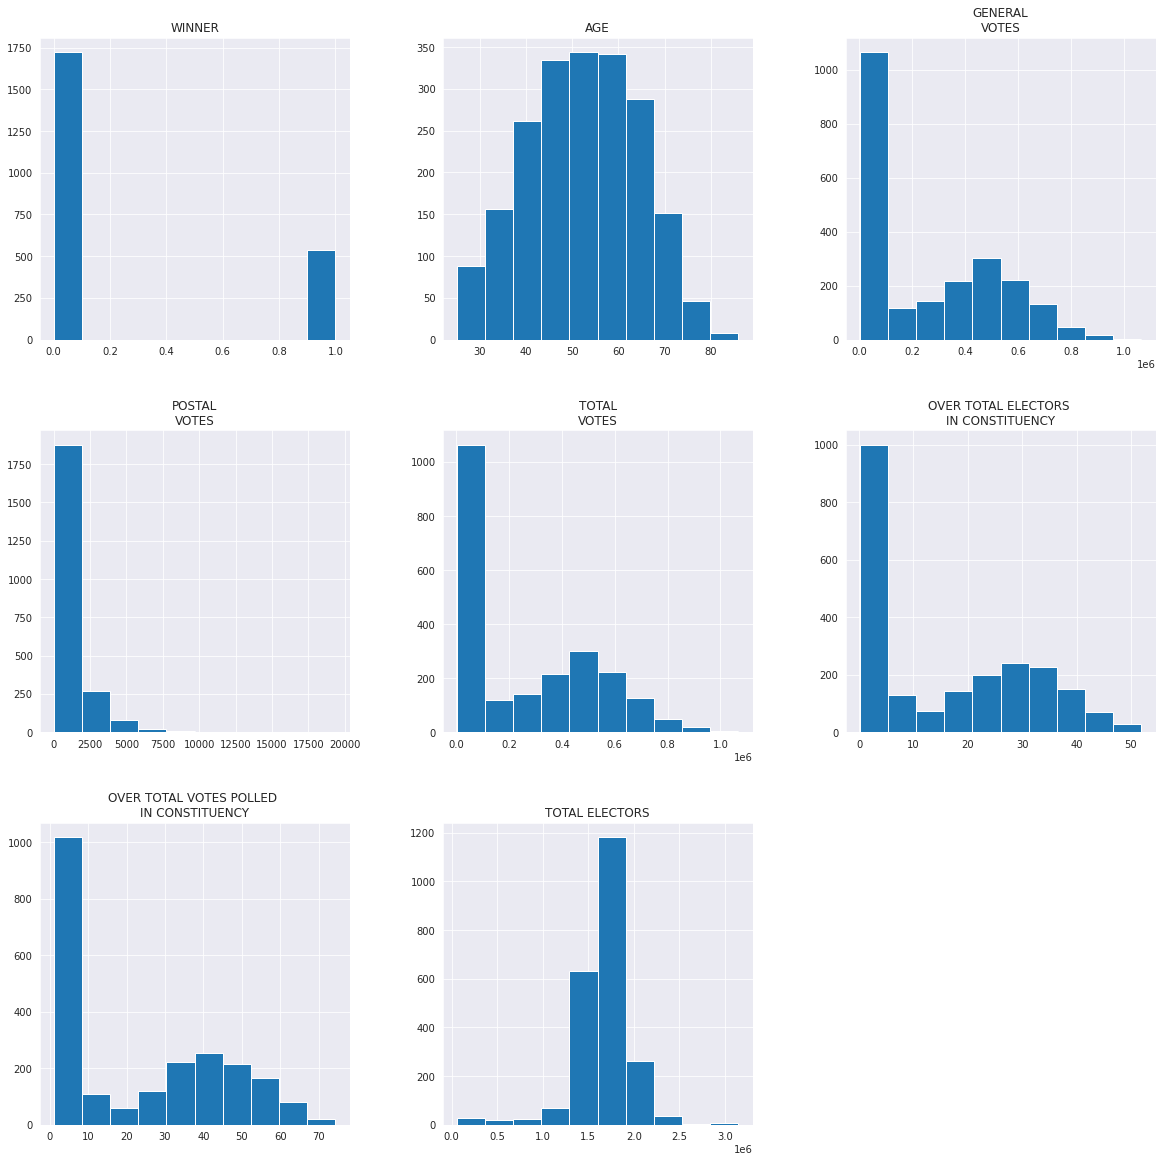

In [165]:
df.hist(figsize=(20,20),bins=10)
plt.show()

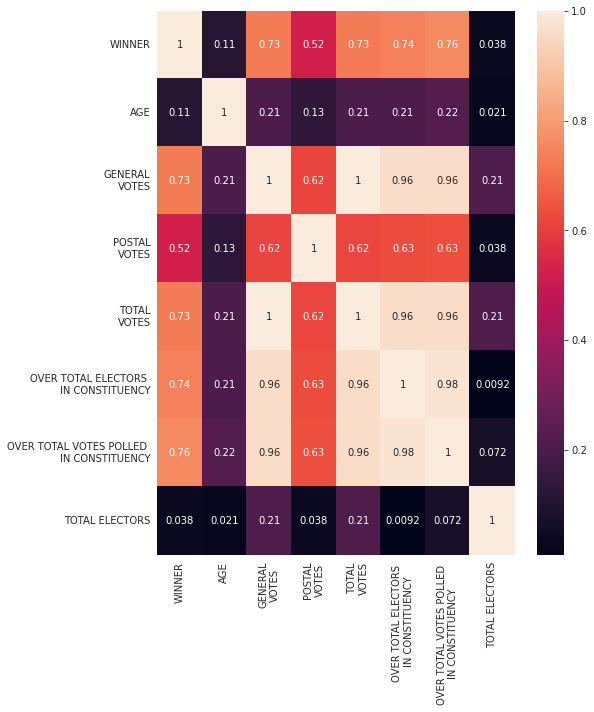

In [166]:
corr_matrix = df.corr().abs()
plt.figure(figsize=(8,10))
ax = sns.heatmap(corr_matrix,annot=True)

In [167]:
print('GENDER WISE STATISTIC OF CONTESTANTS')
print( gen1)
print("===========================================")
print('GENDER WISE STATISTIC OF WINNER')
print( gen2)

GENDER WISE STATISTIC OF CONTESTANTS
MALE      1760
FEMALE     258
Name: GENDER, dtype: int64
GENDER WISE STATISTIC OF WINNER
MALE      463
FEMALE     76
Name: GENDER, dtype: int64


Text(0, 0.5, 'Count')

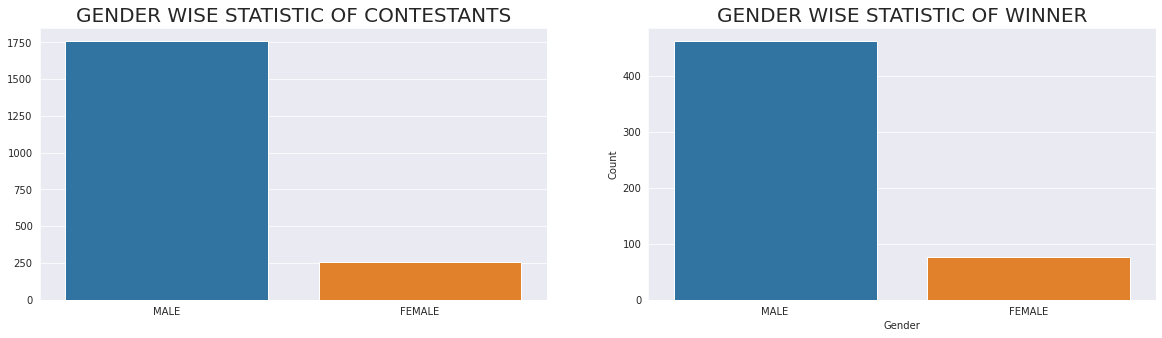

In [168]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))


gen1  = df.GENDER.value_counts()
sns.set_style("darkgrid")
#plt.figure(figsize=(10,4))
sns.barplot(x=gen1.index, y=gen1.values,ax=axes[0])
plt.xlabel('Gender')
plt.ylabel('Count')

axes[0].set_title('GENDER WISE STATISTIC OF CONTESTANTS', fontsize = 20)



gen2  = df1.GENDER.value_counts()
sns.set_style("darkgrid")
#plt.figure(figsize=(10,4))
sns.barplot(x=gen2.index, y=gen2.values,ax=axes[1])
axes[1].set_title('GENDER WISE STATISTIC OF WINNER', fontsize = 20)
plt.xlabel('Gender')

plt.ylabel('Count')





#Selected Candidates

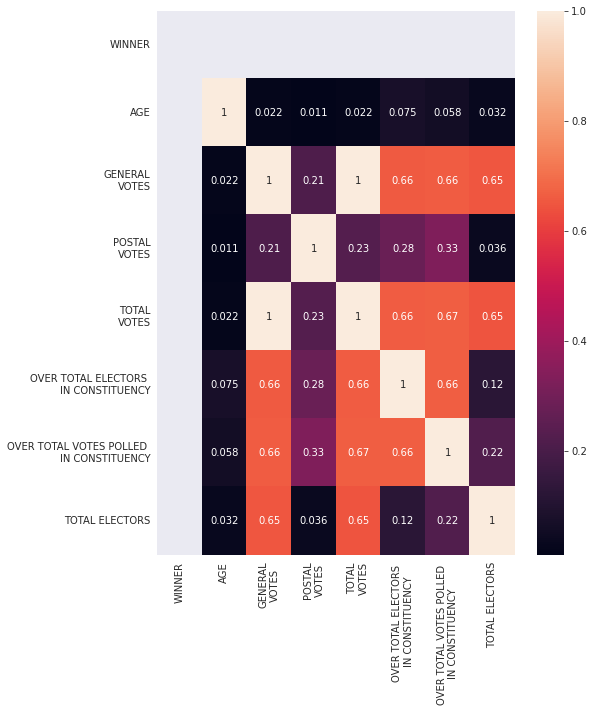

In [169]:
corr_matrix = df1.corr().abs()
plt.figure(figsize=(8,10))
ax = sns.heatmap(corr_matrix,annot=True)

# Votes in election

In [170]:
print("\n"+ "Postal Votes in election") 
print(df['POSTAL\nVOTES'].sum())
print("\n Postal Votes in election")
print(df['GENERAL\nVOTES'].sum())
print("\nTotal Votes in election ")
print(df['TOTAL\nVOTES'].sum())


Postal Votes in election
2241978

 Postal Votes in election
591998725

Total Votes in election 
594240703


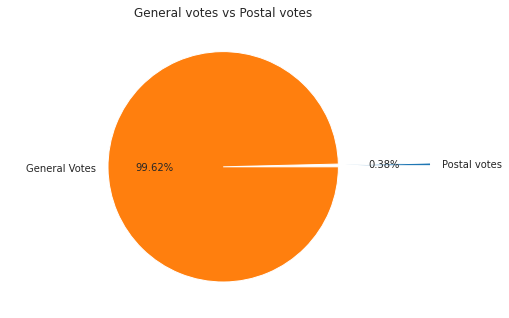

In [171]:
a=[df['POSTAL\nVOTES'].sum(),df['GENERAL\nVOTES'].sum()]
b=['Postal votes','General Votes']
#vcc  = df1.PARTY.value_counts()
x=b
y=a
ex=[0.8,0]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(y, labels = x,autopct='%1.2f%%',explode = ex)
plt.title("General votes vs Postal votes")
plt.show()

# Winner parties

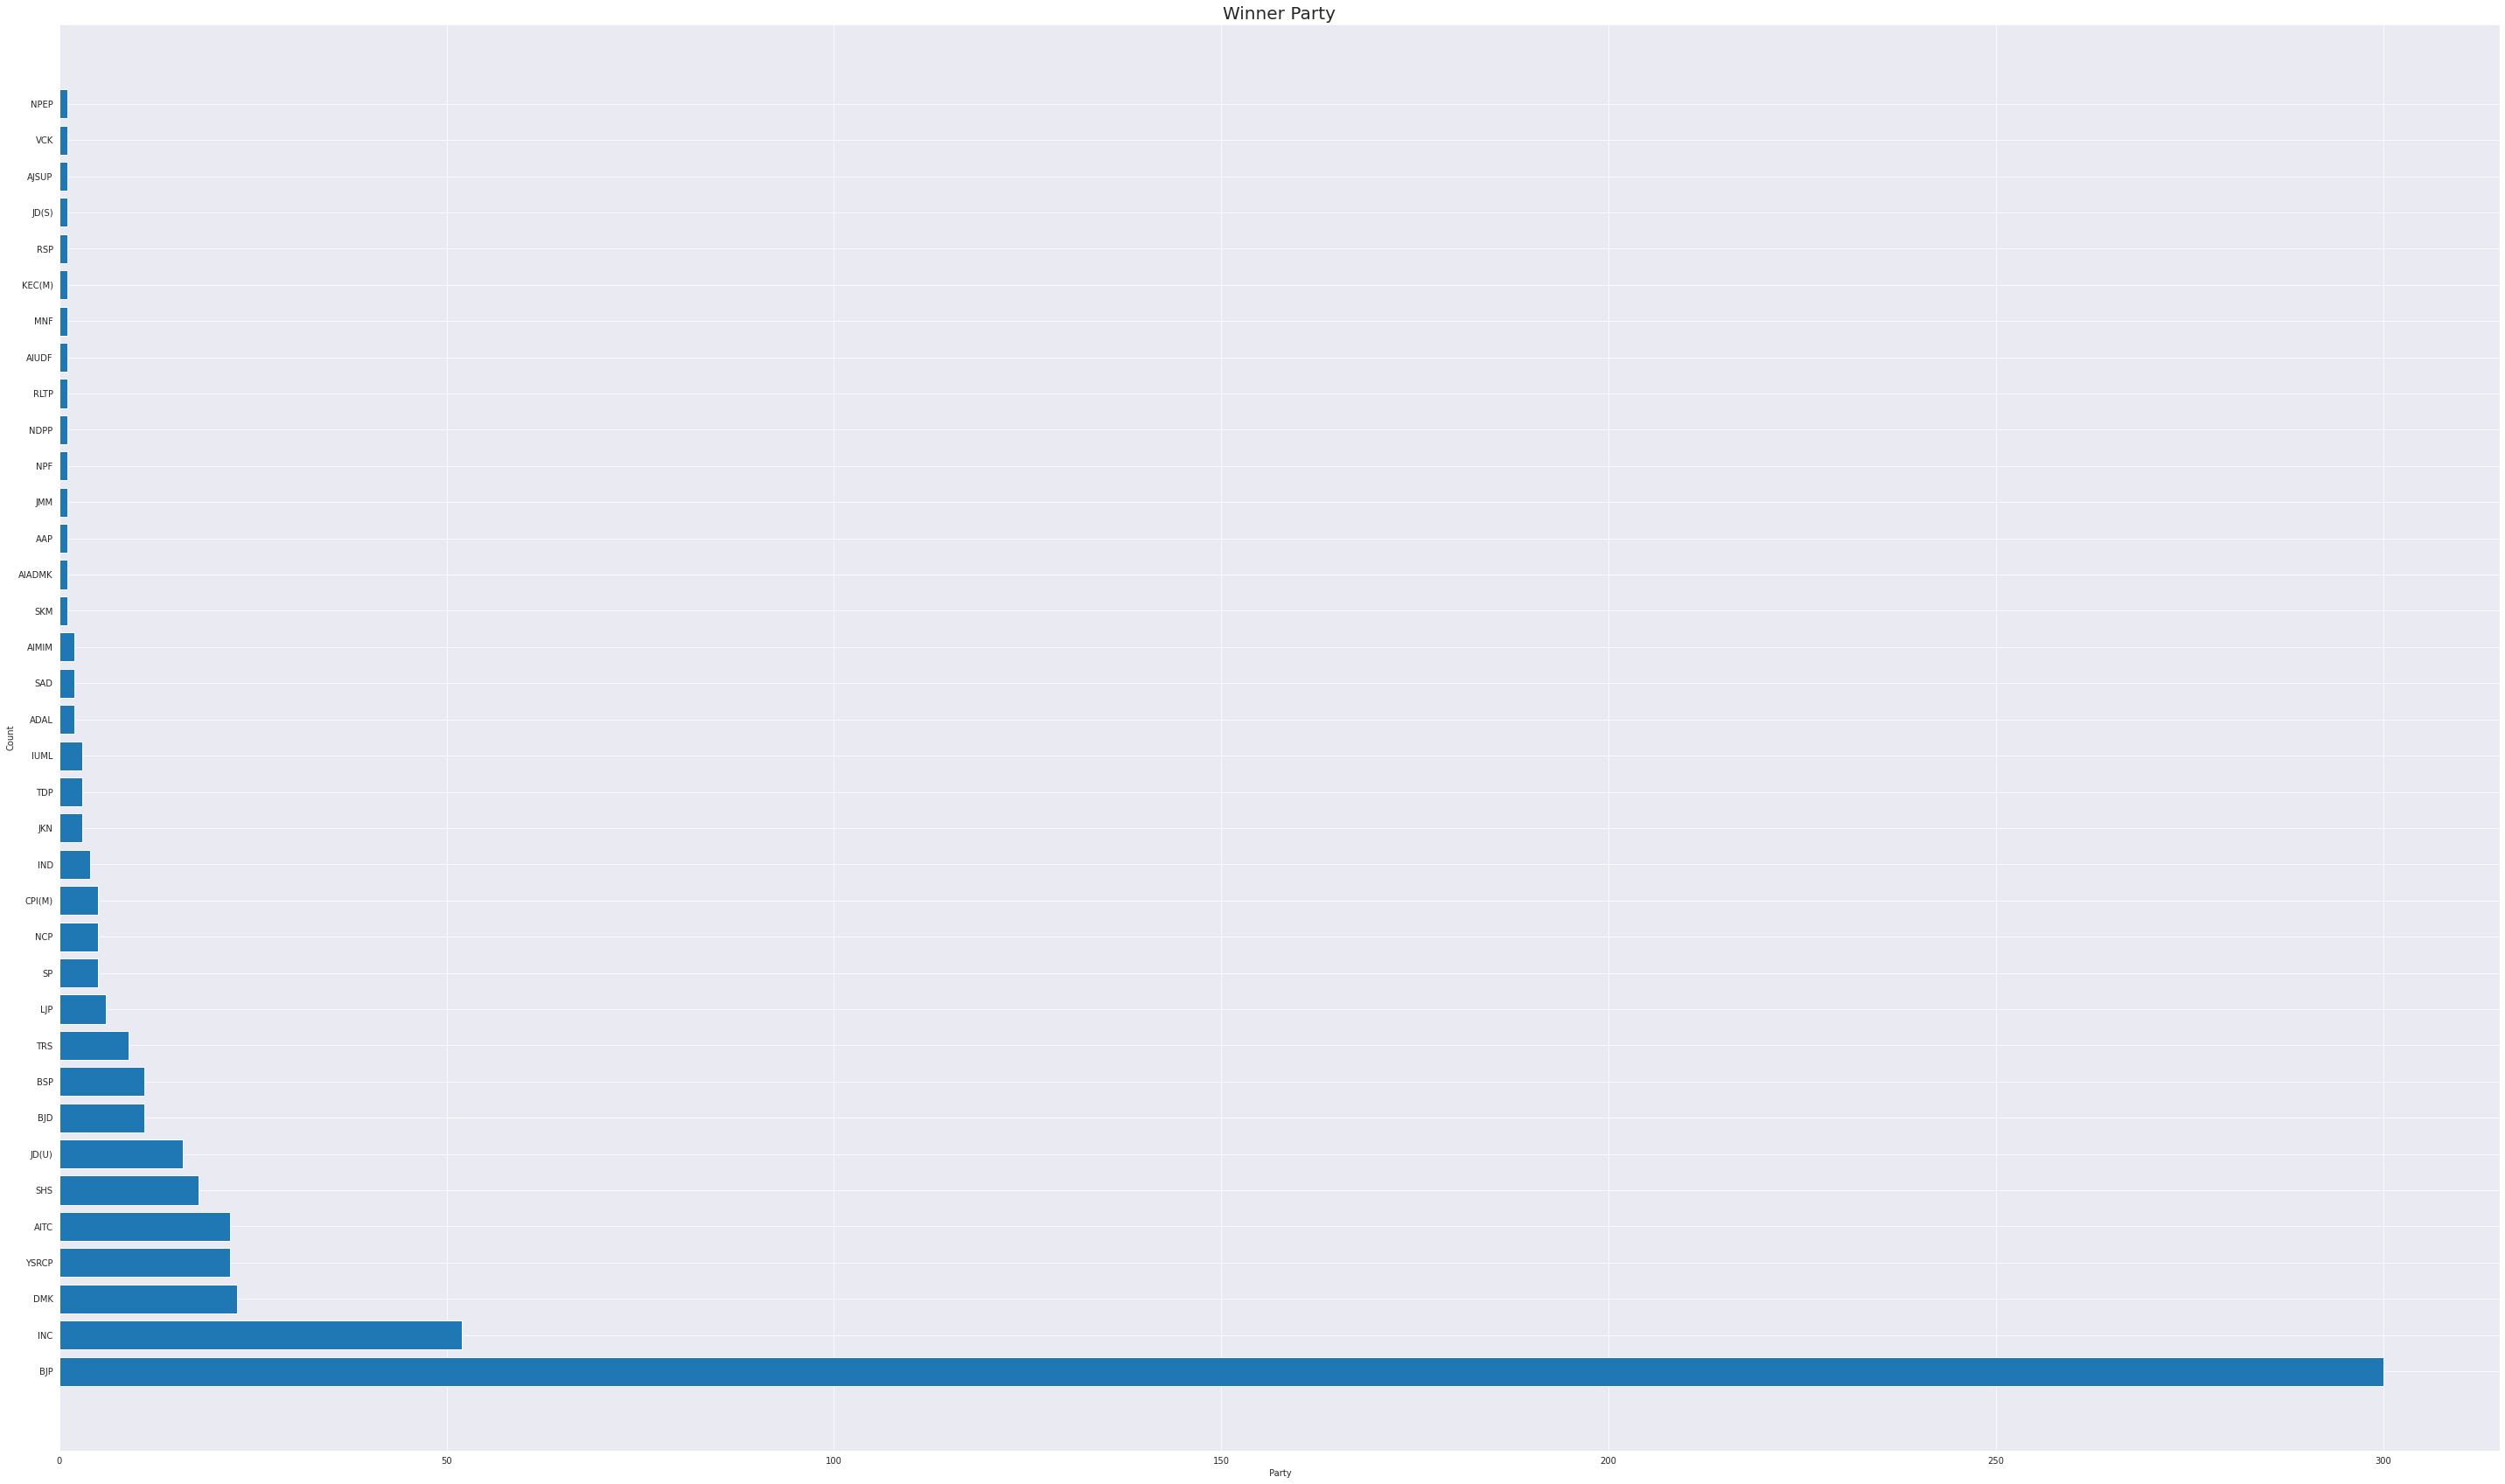

BJP       300
INC        52
DMK        23
YSRCP      22
AITC       22
SHS        18
JD(U)      16
BJD        11
BSP        11
TRS         9
LJP         6
SP          5
NCP         5
CPI(M)      5
IND         4
JKN         3
TDP         3
IUML        3
ADAL        2
SAD         2
AIMIM       2
SKM         1
AIADMK      1
AAP         1
JMM         1
NPF         1
NDPP        1
RLTP        1
AIUDF       1
MNF         1
KEC(M)      1
RSP         1
JD(S)       1
AJSUP       1
VCK         1
NPEP        1
Name: PARTY, dtype: int64


In [172]:
vcc  = df1.PARTY.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(50,30))
x=vcc.index
y=vcc.values
plt.barh(x, y)
plt.title('Winner Party', fontsize = 20)
plt.xlabel(' Party')
plt.ylabel('Count')
plt.show()
print(vcc)

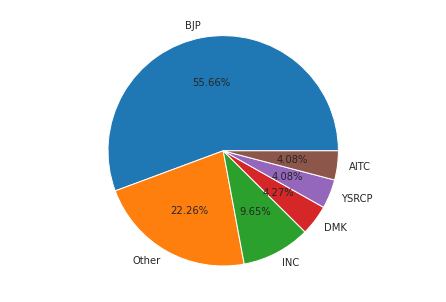

In [173]:
#df1.loc[df1.PARTY.value_counts() <9, 'PARTY'] ='Other' 
df1.loc[df1['PARTY'].value_counts()[df1['PARTY']].values < 20, 'PARTY'] = "Other"


vcc  = df1.PARTY.value_counts()
x=vcc.index
y=vcc.values
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(y, labels = x,autopct='%1.2f%%')
plt.show()



#Youngest Candidates

In [174]:
candidate_age_2019 = df[df['AGE'] > 18]

In [175]:
df[df['AGE'] == df['AGE'].min()]

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL_CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
681,Chhattisgarh,DURG,GEETANJALI SINGH,0,BSP,Elephant,FEMALE,0,25.0,GENERAL,Post Graduate,"Rs 54,48,306\n ~ 54 Lacs+","Rs 29,00,000\n ~ 29 Lacs+",20071,53,20124,1.037176,1.444943,1940269
1132,Odisha,KEONJHAR,Chandrani Murmu,0,BJD,Conch,FEMALE,0,25.0,ST,Graduate Professional,"Rs 3,40,580\n ~ 3 Lacs+",Rs 0\n ~,525886,473,526359,34.704501,44.740195,1516688
1502,Tamil Nadu,NAGAPATTINAM,MALATHI P,0,NTK,Ganna Kisan,FEMALE,0,25.0,SC,Graduate Professional,"Rs 1,19,000\n ~ 1 Lacs+","Rs 55,400\n ~ 55 Thou+",51207,241,51448,3.946461,5.129821,1303649
1789,West Bengal,RANAGHAT,RUPALI BISWAS,0,AITC,Flowers and Grass,FEMALE,0,25.0,SC,Graduate,"Rs 73,70,951\n ~ 73 Lacs+","Rs 17,27,897\n ~ 17 Lacs+",548736,1089,549825,31.200135,37.030315,1762252
1848,Bihar,SAMASTIPUR (SC),Asha Devi,0,AAM,CHAPATI ROLLER,FEMALE,1,25.0,SC,Literate,"Rs 16,28,121\n ~ 16 Lacs+","Rs 51,000\n ~ 51 Thou+",14099,15,14114,0.840604,1.384036,1679030
1952,Jharkhand,SINGHBHUM,PRATAP SINGH BANARA,0,APoI,Coat,MALE,0,25.0,ST,Post Graduate,"Rs 52,985\n ~ 52 Thou+",Rs 0\n ~,11286,12,11298,0.889664,1.284570,1269917



# Senior candidates

In [176]:
df[df['AGE'] == df['AGE'].max()]

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL_CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
1855,Uttar Pradesh,SAMBHAL,DR. SHAFIQUR REHMAN BARQ,1,SP,Bicycle,MALE,0,86.0,GENERAL,Graduate,"Rs 1,32,96,671\n ~ 1 Crore+",Rs 0\n ~,657505,501,658006,35.980914,55.584784,1828764
2137,Karnataka,TUMKUR,H. D. DEVEGOWDA,0,JD(S),A lady farmer carrying paddy on her head,MALE,0,86.0,GENERAL,Others,"Rs 6,00,84,453\n ~ 6 Crore+","Rs 97,98,283\n ~ 97 Lacs+",581624,1164,582788,36.230755,46.792654,1608545


# Categorywise candidates distribution





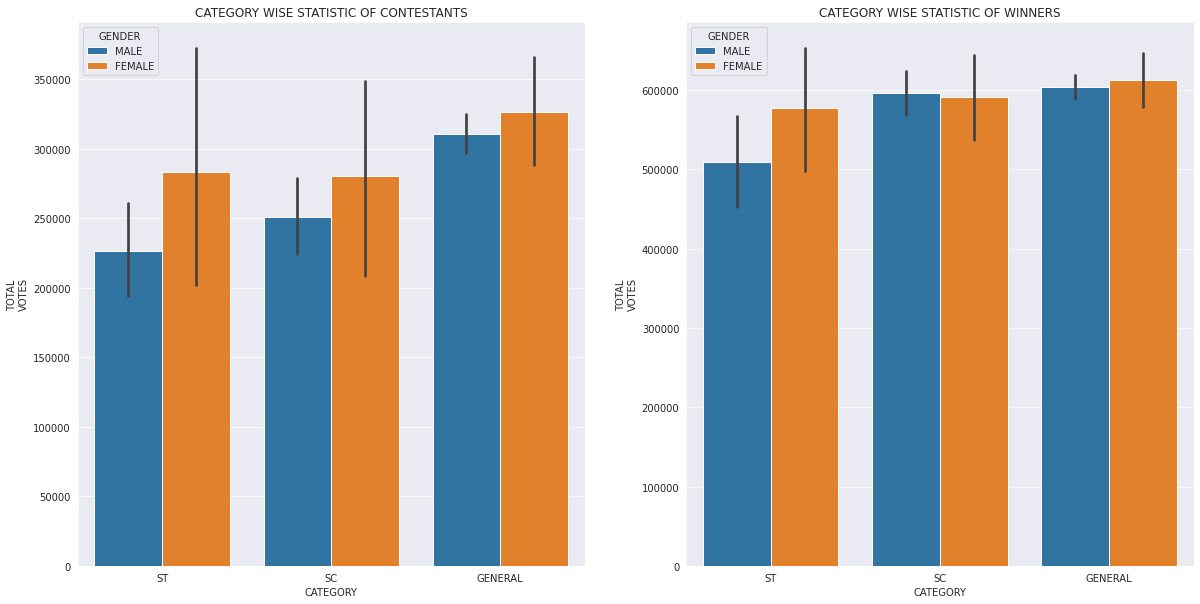

In [177]:
# Barplot Side by Side
fig, axes = plt.subplots(1, 2, figsize=(20,10))

sns.barplot(df['CATEGORY'],df['TOTAL\nVOTES'],hue = df['GENDER'],ax=axes[0])
axes[0].set_title('CATEGORY WISE STATISTIC OF CONTESTANTS');


sns.barplot(df1['CATEGORY'],df1['TOTAL\nVOTES'],hue = df1['GENDER'],ax=axes[1])
axes[1].set_title('CATEGORY WISE STATISTIC OF WINNERS');


In [178]:
df['CATEGORY'].value_counts()

GENERAL    1392
SC          383
ST          243
Name: CATEGORY, dtype: int64

In [179]:
df['EDUCATION'].value_counts()

Post Graduate            502
Graduate                 441
Graduate Professional    336
12th Pass                256
10th Pass                196
8th Pass                  78
Doctorate                 73
Others                    50
Literate                  30
5th Pass                  28
Not Available             22
Illiterate                 5
Post Graduate\n            1
Name: EDUCATION, dtype: int64

In [180]:


df['CRIMINAL_CASES'] = df['CRIMINAL_CASES'].str.replace('Not Available' , "0")
df['CRIMINAL_CASES'] = pd.to_numeric(df['CRIMINAL_CASES'] , errors='coerce')


In [181]:
state_wise_criminal = df.groupby('STATE')[['CRIMINAL_CASES']].sum().sort_values(by=['CRIMINAL_CASES']).tail(15).sort_values(by=['CRIMINAL_CASES'])

 

# STATE WISE CRIMINAL CASE OF CONTESTANTS

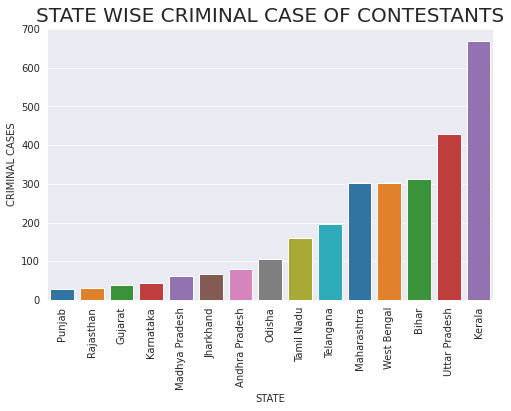

In [187]:


sns.set_style("darkgrid")
plt.figure(figsize=(8,5))
sns.barplot(x=state_wise_criminal.index , y = state_wise_criminal['CRIMINAL_CASES'] ,  palette='tab10')
plt.title('STATE WISE CRIMINAL CASE OF CONTESTANTS', fontsize = 20)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.xlabel('STATE')
plt.ylabel('CRIMINAL CASES')
plt.show()



In [189]:
df.loc[df['CRIMINAL_CASES'].idxmax()]

STATE                                                           Kerala
CONSTITUENCY                                            PATHANAMTHITTA
NAME                                                       K SURENDRAN
WINNER                                                               0
PARTY                                                              BJP
SYMBOL                                                           Lotus
GENDER                                                            MALE
CRIMINAL_CASES                                                   240.0
AGE                                                               49.0
CATEGORY                                                       GENERAL
EDUCATION                                                     Graduate
ASSETS                                       Rs 40,44,300\n ~ 40 Lacs+
LIABILITIES                                  Rs 13,08,799\n ~ 13 Lacs+
GENERAL\nVOTES                                                  295627
POSTAL

In [183]:
df['EDUCATION'] = df['EDUCATION'].str.replace("Post Graduate\n" , "Post Graduate")
print("EDUCATION OF CONTESTANTS"+"\n")
print(df['EDUCATION'].value_counts())

df1['EDUCATION'] = df1['EDUCATION'].str.replace("Post Graduate\n" , "Post Graduate")
print("=================================")
print('\n\nEDUCATION OF WINNERS'+'\n')
print(df1['EDUCATION'].value_counts())

EDUCATION OF CONTESTANTS

Post Graduate            503
Graduate                 441
Graduate Professional    336
12th Pass                256
10th Pass                196
8th Pass                  78
Doctorate                 73
Others                    50
Literate                  30
5th Pass                  28
Not Available             22
Illiterate                 5
Name: EDUCATION, dtype: int64


EDUCATION OF WINNERS

Post Graduate            135
Graduate                 132
Graduate Professional     99
12th Pass                 69
10th Pass                 45
Doctorate                 23
Others                    17
8th Pass                  12
5th Pass                   4
Literate                   2
Illiterate                 1
Name: EDUCATION, dtype: int64


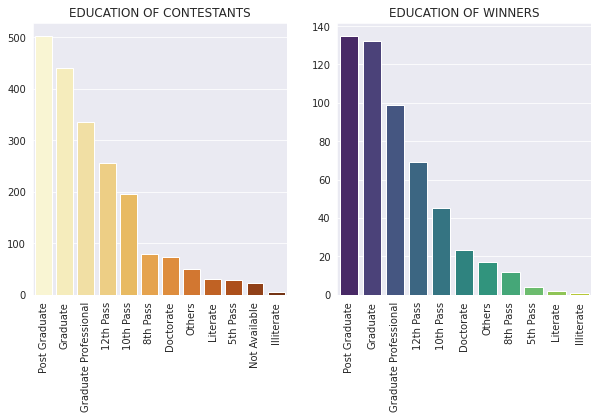

In [184]:

# Barplot Side by Side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

edu1  = df.EDUCATION.value_counts()
# Passing X axis and Y axis along with subplot position
sns.barplot(x = edu1.index , y = edu1.values , ax=axes[0] , palette='YlOrBr');
axes[0].tick_params(axis='x' , rotation=90); #changing the X axis poition to read more clearly
axes[0].set_title('EDUCATION OF CONTESTANTS');


edu2  = df1.EDUCATION.value_counts()
#We can also change the color of the barplots by giving different palletes
sns.barplot(x = edu2.index , y = edu2.values , ax=axes[1] , palette='viridis');
axes[1].set_title('EDUCATION OF WINNERS');
plt.xticks(rotation=90);


In [185]:

state_votes_1 = pd.pivot_table(df , values='OVER TOTAL ELECTORS \nIN CONSTITUENCY' , index='STATE' , columns='PARTY' , aggfunc=np.mean)
state_votes_2 = pd.pivot_table(df1 , values='OVER TOTAL VOTES POLLED \nIN CONSTITUENCY' , index='STATE' , columns='PARTY' , aggfunc=np.mean)
print("\nPartywise statistics percentage value of votes out of the total votes polled in the constituency")
state_votes_2


Partywise statistics percentage value of votes out of the total votes polled in the constituency


PARTY,AITC,BJP,DMK,INC,Other,YSRCP
STATE,,,,,,
Andaman & Nicobar Islands,NaN,NaN,NaN,45.954156,NaN,NaN
Andhra Pradesh,NaN,NaN,NaN,NaN,44.817031,49.606533
Arunachal Pradesh,NaN,57.030380,NaN,NaN,NaN,NaN
Assam,NaN,55.438727,NaN,49.641259,37.700677,NaN
Bihar,NaN,55.512325,NaN,33.315028,50.261283,NaN
Chandigarh,NaN,50.628398,NaN,NaN,NaN,NaN
Chhattisgarh,NaN,51.995803,NaN,45.030031,NaN,NaN
Dadra & Nagar Haveli,NaN,NaN,NaN,NaN,45.441342,NaN
Daman & Diu,NaN,42.981263,NaN,NaN,NaN,NaN
